<a href="https://colab.research.google.com/github/kelvynlukito/MachineLearning_Regression-with-Bagging/blob/main/Regression_Bagging_MPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
# Read Dataset
df = pd.read_csv("/content/autos_mpg.csv")
df = df.drop(['car_name'],axis=1)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


# **Data Preprocessing**

In [ ]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
pd.isnull(df).isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [ ]:
pd.isna(df).sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

23.514572864321607
23.0
0    13.0
dtype: float64


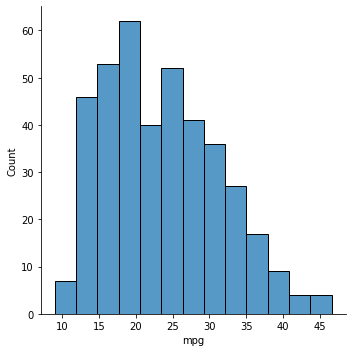

In [ ]:
# Show data distribution 
sns.displot(df['mpg'])
from statistics import median
from statistics import mean
from statistics import mode
print(df['mpg'].mean())
print(df['mpg'].median())
print(df['mpg'].mode())

In [ ]:
# Changes all datatype into numeric
from statistics import median
df['horsepower'] = pd.to_numeric(df['horsepower'],errors = 'coerce')
df['mpg'] = df['mpg'].astype(int)
df['displacement'] = df['displacement'].astype(int)
df['acceleration'] = df['acceleration'].astype(int)
print(df.dtypes)

mpg               int64
cylinders         int64
displacement      int64
horsepower      float64
weight            int64
acceleration      int64
model_year        int64
origin            int64
dtype: object


Based on reference https://www.naukri.com/learning/articles/handling-missing-data-mean-median-mode/,
1.   Mean-It is preferred if data is numeric and not skewed.
2.   Median-It is preferred if data is numeric and skewed.
3.   Mode-It is preferred if the data is a string(object or numeric.




In [ ]:
# Replace all null / NaN / ? value based on the data distribution
df['horsepower'] = df['horsepower'].replace(['?'], 'null')
pd.isna(df).sum()
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median(),inplace=False)
df[['horsepower']]
pd.isna(df).sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [ ]:
# Checking all Variances for each feature
df.var()

mpg                 60.101901
cylinders            2.893415
displacement     10872.441407
horsepower        1460.969052
weight          717140.990526
acceleration         7.528581
model_year          13.672443
origin               0.643292
dtype: float64

In [ ]:
# Import preprocessing library for normalized all value of the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_norm = df.drop(['mpg'],axis=1)
scaled = scaler.fit_transform(df_norm)
print(scaled)

[[1.         0.61757106 0.45652174 ... 0.25       0.         0.        ]
 [1.         0.72868217 0.64673913 ... 0.1875     0.         0.        ]
 [1.         0.64599483 0.56521739 ... 0.1875     0.         0.        ]
 ...
 [0.2        0.17312661 0.20652174 ... 0.1875     1.         0.        ]
 [0.2        0.13436693 0.17934783 ... 0.625      1.         0.        ]
 [0.2        0.13178295 0.19565217 ... 0.6875     1.         0.        ]]


**Model That Used in this Study Case is SVM, Linear Regression and KNN**

In [ ]:
# Import all support library 
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

In [ ]:
# Seperated trining data and testing data
X = df.drop(['mpg'],axis=1)
y = df['mpg']
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.2)
x_test.shape

(80, 7)

In [ ]:
"""
X, y = make_regression(n_samples=70, n_features=7,
                       n_informative=2, n_targets=1,
                       random_state=10, shuffle=False)

regr_svr = BaggingRegressor(base_estimator=SVR(),n_estimators=200, random_state=0, max_samples=0.8, oob_score=True).fit(X,y)
df_svr = df.drop(['mpg'],axis=1)
result_pred = regr_svr.predict(df_svr)
# Evaluate the Model
evaluation_r2 = metrics.r2_score(df['mpg'],result_pred)
print(evaluation)
"""

"\nX, y = make_regression(n_samples=70, n_features=7,\n                       n_informative=2, n_targets=1,\n                       random_state=10, shuffle=False)\n\nregr_svr = BaggingRegressor(base_estimator=SVR(),n_estimators=200, random_state=0, max_samples=0.8, oob_score=True).fit(X,y)\ndf_svr = df.drop(['mpg'],axis=1)\nresult_pred = regr_svr.predict(df_svr)\n# Evaluate the Model\nevaluation_r2 = metrics.r2_score(df['mpg'],result_pred)\nprint(evaluation)\n"

# **Support Vector Regression**

In [ ]:
regr_svr = BaggingRegressor(base_estimator=SVR(),n_estimators=200, random_state=0, max_samples=0.8, oob_score=True).fit(x_train, y_train)
df_svr = df.drop(['mpg'],axis=1)
result_pred = regr_svr.predict(df_svr)
# Evaluate the Model
evaluation_r2 = metrics.r2_score(df['mpg'],result_pred)
evaluation_MSE = metrics.Mean_Squared_Error(df['mpg'],result_pred)
print(f'R2  : {evaluation_r2}')
print(f'MSE : {evaluation_MSE}')

0.8172038232776109


In [ ]:
regr_svr.predict(df_svr)

array([18.36574867, 17.1116357 , 18.80524109, 18.8394989 , 18.73643674,
       14.00435769, 13.94953898, 14.09252055, 13.736573  , 16.17099169,
       17.89408505, 17.64139725, 16.67566419, 21.14310786, 26.82377479,
       23.37940894, 23.82101945, 25.21188339, 28.41198611, 30.05836346,
       24.68418374, 26.43125637, 26.81229138, 27.72540574, 24.76290315,
       13.32294799, 13.96021507, 13.93265125, 13.15798773, 28.41211493,
       27.52205282, 27.78009002, 28.90834075, 24.82452589, 18.8991664 ,
       19.64220191, 19.84009769, 19.95410873, 14.52470367, 13.65900197,
       14.74856073, 15.02132543, 12.92422538, 13.09875905, 12.92068469,
       22.33252837, 26.55848823, 19.97785318, 21.02768796, 27.82653415,
       28.43620863, 28.77112122, 28.81361763, 30.36885292, 31.04905681,
       30.05881574, 29.43430878, 27.45501271, 28.43996337, 27.64458286,
       26.55079003, 27.78823067, 14.28179383, 13.88424511, 14.8524442 ,
       14.85371305, 17.28560877, 13.26266398, 13.5902099 , 13.70

# **Linier Regression**

In [ ]:
regr_ln = BaggingRegressor(base_estimator=LinearRegression(),n_estimators=200, random_state=0, max_samples=0.8, oob_score=True).fit(x_train, y_train)
df_ln = df.drop(['mpg'],axis=1)
result_pred = regr_ln.predict(df_svr)
# Evaluate the Model
evaluation_r2 = metrics.r2_score(df['mpg'],result_pred)
evaluation_MSE = metrics.Mean_Squared_Error(df['mpg'],result_pred)
print(f'R2  : {evaluation_r2}')
print(f'MSE : {evaluation_MSE}')

0.8172038232776109


In [ ]:
regr_ln.predict(df_ln)

array([15.13931169, 14.09702785, 15.43967359, 15.29668322, 15.06890988,
       10.63687477, 10.62671635, 10.60347116, 10.19989014, 13.13615263,
       15.45039684, 14.22383897, 14.58730178, 19.36463135, 24.30589763,
       19.18386891, 19.57999208, 21.14898736, 25.63989374, 27.44858073,
       21.09452919, 22.33002194, 22.90300985, 23.41654318, 20.53707981,
        7.62586484,  8.54631924,  8.36804418,  6.4685482 , 26.37149596,
       23.52084372, 25.91569254, 24.58243429, 21.65305024, 16.15497624,
       17.45931096, 17.80642853, 17.39158997, 11.40429568, 10.38390452,
       12.06982133, 11.86874874,  6.62664751,  8.62880746,  5.86445543,
       19.7759647 , 23.20835812, 17.7810009 , 18.81466609, 23.42035124,
       25.33704758, 25.76396676, 25.3815278 , 29.15996716, 30.11291812,
       27.89024708, 25.49509488, 26.41248196, 24.71491219, 26.25797387,
       23.6964849 , 24.32570776, 11.69100756, 11.76363018, 12.33341676,
       12.97253522, 15.01664952, 10.07364129, 10.37314378, 10.62

# **KNN**

In [ ]:
regr_KNN = BaggingRegressor(base_estimator=KNeighborsRegressor(),n_estimators=200, random_state=0, max_samples=0.8, oob_score=True).fit(x_train, y_train)
df_KNN = df.drop(['mpg'],axis=1)
result_pred = regr_ln.predict(df_KNN)
# Evaluate the Model
evaluation_r2 = metrics.r2_score(df['mpg'],result_pred)
evaluation_MSE = metrics.Mean_Squared_Error(df['mpg'],result_pred)
print(f'R2  : {evaluation_r2}')
print(f'MSE : {evaluation_MSE}')

0.8172038232776109


In [ ]:
regr_KNN.predict(df_KNN)

array([17.828, 16.332, 17.976, 17.933, 17.897, 14.565, 14.445, 14.751,
       13.93 , 16.033, 16.161, 15.728, 16.975, 20.98 , 26.957, 22.197,
       21.799, 25.007, 29.15 , 30.482, 25.387, 27.141, 26.795, 26.353,
       24.606, 12.817, 14.619, 14.634, 12.655, 29.15 , 27.874, 27.132,
       31.649, 24.431, 19.011, 18.797, 18.754, 19.062, 14.652, 13.29 ,
       14.869, 14.492, 12.064, 12.708, 12.082, 22.481, 25.58 , 18.996,
       18.674, 28.563, 28.823, 33.706, 32.483, 34.073, 34.018, 30.419,
       33.034, 26.636, 29.334, 27.79 , 25.023, 27.684, 14.057, 14.434,
       14.625, 14.45 , 16.064, 12.834, 13.45 , 13.406, 13.811, 28.353,
       16.672, 14.621, 14.154, 14.453, 23.516, 26.348, 24.845, 30.913,
       25.882, 26.161, 26.144, 29.465, 31.052, 14.37 , 16.064, 15.102,
       14.419, 16.43 , 12.088, 13.396, 14.698, 14.253, 12.738, 12.059,
       15.851, 19.023, 19.009, 20.951, 22.912, 23.542, 32.591, 12.029,
       12.016, 13.047, 13.409, 21.366, 26.187, 25.56 , 26.58 , 29.848,
      